In [24]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/mexico-earthquake_00000153_post_disaster_f.jpg
giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/tuscaloosa-tornado_00000078_post_disaster_f.jpg
giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/woolsey-fire_00000307_pre_disaster_b.jpg
giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/santa-rosa-wildfire_00000177_post_disaster_c.jpg


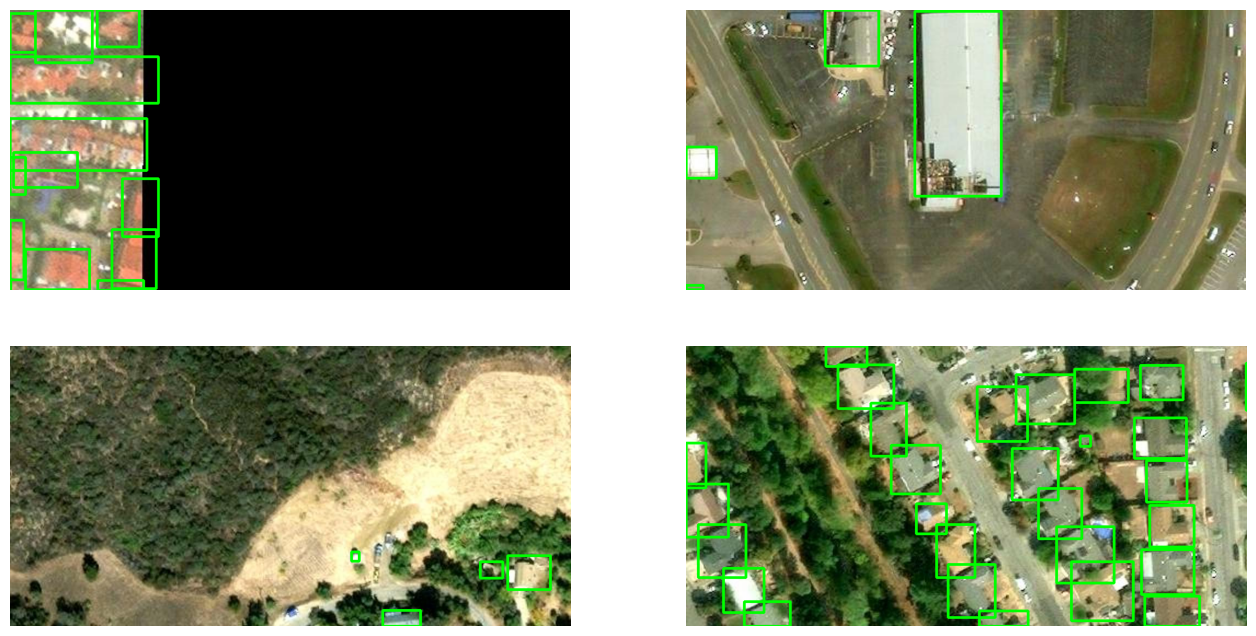

In [25]:
# Define the paths to the images and labels directories
train_images = "giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/"
train_labels = "giant_geotiff/xview2_geotiff/geotiffs/full_final/train/labels/"

test_images = "giant_geotiff/xview2_geotiff/geotiffs/full_final/test_pre/images/"
#test_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "giant_geotiff/xview2_geotiff/geotiffs/full_final/valid/images/"
val_labels = "giant_geotiff/xview2_geotiff/geotiffs/full_final/valid/labels/"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 4)

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 2
    col = i % 2
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    print(image_path)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [26]:
# Load an image using OpenCV
image = cv2.imread("giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/guatemala-volcano_00000000_post_disaster_a.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 1024x512 and 3 channels.


In [27]:
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = 'giant_geotiff/xview2_geotiff/geotiffs/full_final/data.yaml',
            epochs = 50,
            imgsz = height,
            seed = 42,
            batch = 16,
            workers = 4)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=giant_geotiff/xview2_geotiff/geotiffs/full_final/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning /home/mark/Documents/competitions/zindi-kuyesera-disaster/giant_geotiff/xview2_geotiff/geotiffs/full_final/train/labels.cache

train: WARNING ⚠️ /home/mark/Documents/competitions/zindi-kuyesera-disaster/giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/moore-tornado_00000056_pre_disaster_b.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/mark/Documents/competitions/zindi-kuyesera-disaster/giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/palu-tsunami_00000106_post_disaster_f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/mark/Documents/competitions/zindi-kuyesera-disaster/giant_geotiff/xview2_geotiff/geotiffs/full_final/train/images/palu-tsunami_00000106_pre_disaster_f.jpg: 1 duplicate labels removed



val: Scanning /home/mark/Documents/competitions/zindi-kuyesera-disaster/giant_geotiff/xview2_geotiff/geotiffs/full_final/valid/labels.cache..


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.3G      1.649      1.098      1.224        223        512: 100%|██████████| 3221/3221 [08:12<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376      0.685       0.53      0.589      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.8G      1.587     0.9719      1.179        141        512: 100%|██████████| 3221/3221 [08:03<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.09it/s]


                   all       8039     124376       0.69      0.531      0.593      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.7G      1.634      1.009      1.202        226        512: 100%|██████████| 3221/3221 [08:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 12.98it/s]


                   all       8039     124376      0.699       0.53      0.589      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.6G       1.63      1.003      1.203        283        512: 100%|██████████| 3221/3221 [07:59<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 12.96it/s]


                   all       8039     124376      0.695      0.545      0.606      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.3G      1.587     0.9639      1.185        225        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.00it/s]


                   all       8039     124376       0.71       0.55       0.62      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.2G      1.555     0.9373      1.171        290        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.02it/s]


                   all       8039     124376      0.722      0.558       0.63      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.4G      1.536     0.9226      1.163        350        512: 100%|██████████| 3221/3221 [07:54<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.00it/s]


                   all       8039     124376      0.726      0.569       0.64      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.8G      1.516     0.9071      1.153        259        512: 100%|██████████| 3221/3221 [07:56<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.03it/s]


                   all       8039     124376      0.722      0.573      0.641      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.9G      1.496     0.8912      1.145        268        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.12it/s]


                   all       8039     124376      0.732      0.577      0.649      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.2G       1.49     0.8832      1.144        215        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376      0.728      0.578      0.649      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.3G      1.476      0.874      1.137        388        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.00it/s]


                   all       8039     124376       0.73      0.585      0.655      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G      1.463     0.8648      1.132        252        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.04it/s]


                   all       8039     124376      0.736      0.587      0.659      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.8G      1.465     0.8631      1.133        223        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.02it/s]


                   all       8039     124376      0.737       0.59       0.66      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.7G      1.461     0.8592      1.132        170        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.04it/s]


                   all       8039     124376      0.737      0.593      0.662      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.1G      1.451     0.8509      1.126        282        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376       0.74      0.593      0.663      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        11G      1.443     0.8446      1.123        352        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376      0.742      0.594      0.665      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.1G      1.436     0.8381       1.12        227        512: 100%|██████████| 3221/3221 [07:56<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.04it/s]


                   all       8039     124376      0.741      0.597      0.666      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.6G      1.428     0.8321      1.117        179        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.03it/s]


                   all       8039     124376      0.742      0.598      0.667      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.6G      1.424     0.8289      1.114        239        512: 100%|██████████| 3221/3221 [07:56<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376      0.742      0.599      0.668      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.4G      1.424     0.8272      1.113        244        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.03it/s]


                   all       8039     124376      0.742        0.6      0.669       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        11G      1.416     0.8215       1.11        134        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376       0.74      0.601      0.669      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.6G      1.407     0.8144      1.106        153        512: 100%|██████████| 3221/3221 [07:54<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.08it/s]


                   all       8039     124376      0.741      0.602       0.67      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.9G      1.406     0.8091      1.106        165        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376      0.743      0.602       0.67      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.4G      1.401     0.8071      1.106        234        512: 100%|██████████| 3221/3221 [07:56<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.07it/s]


                   all       8039     124376      0.743      0.602      0.671      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.6G      1.393     0.8003      1.101        177        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.744      0.603      0.672      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.2G      1.386     0.7938      1.099        361        512: 100%|██████████| 3221/3221 [07:54<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.03it/s]


                   all       8039     124376      0.744      0.604      0.672      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.4G      1.381     0.7882      1.097        237        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.07it/s]


                   all       8039     124376      0.744      0.605      0.673      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.7G      1.379     0.7865      1.097        160        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.744      0.605      0.673      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.4G      1.373     0.7795      1.093        230        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376      0.746      0.605      0.674      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.5G       1.37     0.7761      1.091        307        512: 100%|██████████| 3221/3221 [07:54<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.746      0.605      0.674      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.1G      1.364     0.7691      1.089        178        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.03it/s]


                   all       8039     124376      0.747      0.605      0.674      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        10G      1.355     0.7641      1.085        260        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.748      0.606      0.675      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        11G      1.351     0.7599      1.084        198        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.05it/s]


                   all       8039     124376      0.749      0.606      0.675      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.5G      1.339     0.7481      1.081        384        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 12.99it/s]


                   all       8039     124376       0.75      0.606      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.4G      1.334     0.7435      1.079        290        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376       0.75      0.606      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.6G      1.331     0.7399      1.076        136        512: 100%|██████████| 3221/3221 [07:56<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.01it/s]


                   all       8039     124376       0.75      0.607      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.4G      1.322      0.731      1.073        226        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.751      0.607      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.5G      1.312     0.7233      1.069        188        512: 100%|██████████| 3221/3221 [07:56<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.751      0.608      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.5G       1.31      0.719      1.067        238        512: 100%|██████████| 3221/3221 [07:56<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.04it/s]


                   all       8039     124376      0.754      0.606      0.677      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.1G      1.301     0.7101      1.065        315        512: 100%|██████████| 3221/3221 [07:55<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.752      0.607      0.677      0.396
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        10G      1.293     0.7109      1.085        106        512: 100%|██████████| 3221/3221 [07:54<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.04it/s]


                   all       8039     124376      0.754      0.607      0.677      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.9G      1.286     0.7001      1.081        166        512: 100%|██████████| 3221/3221 [07:53<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.07it/s]


                   all       8039     124376      0.754      0.607      0.677      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.2G      1.276     0.6907      1.078        100        512: 100%|██████████| 3221/3221 [07:53<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.06it/s]


                   all       8039     124376      0.755      0.607      0.677      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.6G      1.266     0.6817      1.074         81        512: 100%|██████████| 3221/3221 [07:53<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.09it/s]


                   all       8039     124376      0.756      0.608      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.2G      1.255     0.6694      1.067         63        512: 100%|██████████| 3221/3221 [07:53<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.09it/s]


                   all       8039     124376      0.756      0.607      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.6G      1.247     0.6617      1.065         74        512: 100%|██████████| 3221/3221 [07:53<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.08it/s]


                   all       8039     124376      0.757      0.607      0.676      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.7G      1.235     0.6501      1.061         94        512: 100%|██████████| 3221/3221 [07:54<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.08it/s]


                   all       8039     124376      0.758      0.607      0.676      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.5G      1.228     0.6431      1.056         56        512: 100%|██████████| 3221/3221 [07:53<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.03it/s]


                   all       8039     124376      0.759      0.607      0.676      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.5G      1.219      0.636      1.052        157        512: 100%|██████████| 3221/3221 [07:53<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.09it/s]


                   all       8039     124376       0.76      0.607      0.676      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.2G      1.211     0.6275      1.048        148        512: 100%|██████████| 3221/3221 [07:54<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:19<00:00, 13.07it/s]


                   all       8039     124376      0.759      0.607      0.676      0.394

50 epochs completed in 6.896 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:22<00:00, 11.19it/s]


                   all       8039     124376      0.753      0.607      0.677      0.396
Speed: 0.0ms preprocess, 1.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x726c207bc940>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [28]:
## special code for when the run did not complete.
checkpoint_path = 'runs/detect/train4/weights/last.pt'
model = YOLO(checkpoint_path)

In [29]:
# Function to perform building detections
def building_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 256x512 33 blds, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 4 blds, 4.2ms
Speed: 0.5ms preprocess, 4.2ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 21 blds, 4.2ms
Speed: 0.5ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 22 blds, 4.8ms
Speed: 0.5ms preprocess, 4.8ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 512)


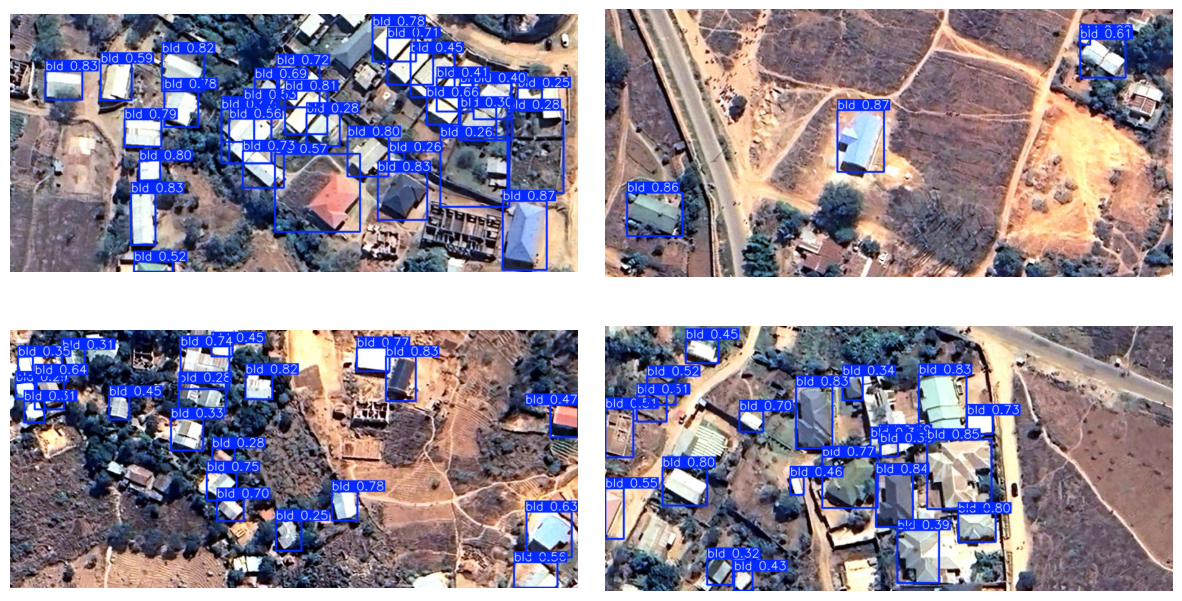

In [30]:
# Define the directory where the custom images are stored
custom_image_dir = '/home/mark/Documents/competitions/zindi-kuyesera-disaster/giant_geotiff/xview2_geotiff/geotiffs/full_final/test_pre/images/'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 4)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 2
    col_idx = i % 2
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = building_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [18]:
def export_test_prediction_csv(model, img_path, output_path):
    # Initialize empty lists to store the data
    data = []
    
    # Process image
    img = cv2.imread(img_path)
    detect_result = model(img)
    boxes = detect_result[0].boxes
    coordinates = boxes.xyxy.cpu().numpy()
    confidences = boxes.conf.cpu().numpy()
    
    # Create rows for each detection
    for box, conf in zip(coordinates, confidences):
        x1, y1, x2, y2 = box
        data.append({
            'x1': x1,
            'y1': y1,
            'x2': x2,
            'y2': y2,
            'confidence': conf
        })
    
    # Convert to DataFrame and save
    df = pd.DataFrame(data)
    df.to_csv(output_path, index=False)
    
    return df  # Optional: return the DataFrame if you want to use it further


In [31]:
test_dir = '/home/mark/Documents/competitions/zindi-kuyesera-disaster/giant_geotiff/xview2_geotiff/geotiffs/full_final/test_pre/'
test_image_dir = test_dir+'images/'
test_prediction_dir = test_dir+'predictions_train4/'

image_files = os.listdir(test_image_dir)
for img_file in image_files:
    img_path = os.path.join(test_image_dir, img_file)
    detect_img = building_detect(img_path)

    export_test_prediction_csv(
        model=model, 
        img_path=img_path, 
        output_path=test_prediction_dir+img_file+'.csv'
        )


0: 256x512 42 blds, 4.5ms
Speed: 22.6ms preprocess, 4.5ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 42 blds, 4.9ms
Speed: 0.4ms preprocess, 4.9ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 70 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 70 blds, 4.9ms
Speed: 0.5ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 224x512 6 blds, 21.2ms
Speed: 0.4ms preprocess, 21.2ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 512)

0: 224x512 6 blds, 4.7ms
Speed: 0.4ms preprocess, 4.7ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 512)

0: 256x512 44 blds, 4.5ms
Speed: 0.5ms preprocess, 4.5ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 44 blds, 4.6ms
Speed: 0.5ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 27 


0: 256x512 24 blds, 3.9ms
Speed: 0.5ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 6 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 6 blds, 4.4ms
Speed: 0.7ms preprocess, 4.4ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 35 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 35 blds, 4.2ms
Speed: 0.6ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 83 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 83 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 22 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 22 bld


0: 256x512 44 blds, 4.5ms
Speed: 0.5ms preprocess, 4.5ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 44 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 24 blds, 4.5ms
Speed: 0.4ms preprocess, 4.5ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 24 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 44 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 44 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 64 blds, 5.2ms
Speed: 0.6ms preprocess, 5.2ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 64 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 58 b


0: 256x512 35 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 100 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 100 blds, 4.3ms
Speed: 0.5ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 3 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 3 blds, 4.4ms
Speed: 0.5ms preprocess, 4.4ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 16 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 16 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 28 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 28 b


0: 256x512 22 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 22 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 142 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 142 blds, 3.9ms
Speed: 0.5ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 24 blds, 4.3ms
Speed: 0.4ms preprocess, 4.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 24 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 51 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 51 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 70


0: 256x512 25 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 31 blds, 4.3ms
Speed: 0.7ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 31 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 50 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 50 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 63 blds, 4.3ms
Speed: 0.4ms preprocess, 4.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 63 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 27 blds, 4.3ms
Speed: 0.5ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 27 b


0: 256x512 1 bld, 3.9ms
Speed: 0.5ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 1 bld, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 27 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 27 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 224x512 16 blds, 4.9ms
Speed: 0.4ms preprocess, 4.9ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 512)

0: 224x512 16 blds, 3.8ms
Speed: 0.4ms preprocess, 3.8ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 512)

0: 256x512 30 blds, 5.1ms
Speed: 0.4ms preprocess, 5.1ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 30 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 3 blds, 


0: 256x512 73 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 42 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 42 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 32 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 32 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 224x512 14 blds, 4.1ms
Speed: 0.4ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 512)

0: 224x512 14 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 512)

0: 256x512 49 blds, 4.1ms
Speed: 0.4ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 49 b


0: 256x512 19 blds, 3.9ms
Speed: 0.6ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 19 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 3 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 3 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 106 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 106 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 140 blds, 4.3ms
Speed: 0.7ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 140 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 31


0: 256x512 60 blds, 4.4ms
Speed: 0.4ms preprocess, 4.4ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 512)

0: 224x512 15 blds, 4.1ms
Speed: 0.4ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 512)

0: 224x512 15 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 512)

0: 224x512 14 blds, 3.8ms
Speed: 0.4ms preprocess, 3.8ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 512)

0: 224x512 14 blds, 3.8ms
Speed: 0.3ms preprocess, 3.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 512)

0: 256x512 24 blds, 4.1ms
Speed: 0.4ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 24 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 81 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 81 b


0: 256x512 10 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 10 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 36 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 36 blds, 4.2ms
Speed: 0.4ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 512)

0: 224x512 3 blds, 4.0ms
Speed: 0.4ms preprocess, 4.0ms inference, 0.3ms postprocess per image at shape (1, 3, 224, 512)

0: 224x512 3 blds, 3.8ms
Speed: 0.4ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 512)

0: 256x512 8 blds, 4.1ms
Speed: 0.5ms preprocess, 4.1ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 8 blds, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 512)

0: 256x512 4 blds, 